In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [2]:
def data_plot(ax, X, BINW, DATA, ERRORLOW, ERRORUP, band=False, **kwargs):
    ax.errorbar(X, DATA, yerr= np.array([ERRORLOW,ERRORUP]), xerr = BINW/2.0, \
                            marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor="black",\
                            markeredgecolor="black",ms=2, color='black', lw = 0.0, elinewidth=0.8, \
                            zorder=10, **kwargs)

In [3]:
def read_trigger_efficiencies(root_file_path):
    with uproot.open(root_file_path) as root_file:
        efficiency_tree = root_file["trigger_efficiencies_tree"]
        
        m_values = efficiency_tree["M"].array()
        n_values = efficiency_tree["N"].array()
        efficiencies = efficiency_tree["Efficiency"].array()
        efficiency_errors = efficiency_tree["EfficiencyError"].array()
        energies = efficiency_tree["Energy"].array()
        
        return m_values, n_values, efficiencies, efficiency_errors, energies

In [4]:
root_file_path = "/home/lane/Software/src/lumilar/system/analysis/data/trigger_efficiencies.root"
m_values, n_values, efficiencies, efficiency_errors, energies = read_trigger_efficiencies(root_file_path)

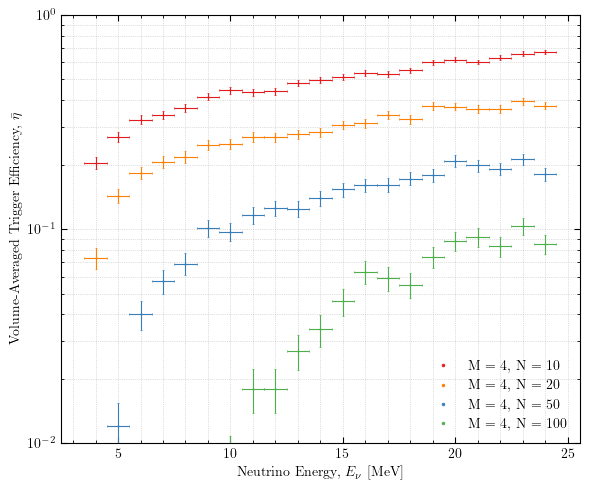

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Get colors from the Set2 palette


# The rest of your plotting code remains the same...


# Use TeX-style font rendering
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# Define the figure size
fig, ax = plt.subplots(figsize=(6, 5))

unique_combinations = set(zip(m_values, n_values))
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', '#A65628', '#F781BF', '#999999']

color_mapping = {}
for i, comb in enumerate(unique_combinations):
    color_mapping[comb] = colors[i % len(colors)]

for i in range(len(energies)):
    efficiency = efficiencies[i]
    if efficiency > 0.002:
        color = color_mapping[(m_values[i], n_values[i])]
        ax.errorbar(energies[i], efficiencies[i], yerr=efficiency_errors[i], xerr=1/2.0,
                    marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                    markeredgecolor=color, ms=1, color=color, lw=0.0, elinewidth=0.8,
                    zorder=10)

sorted_combinations = sorted(unique_combinations, key=lambda comb: comb[1])

# Creating legend handles with crosses
handles = []
for comb in sorted_combinations:
    color = color_mapping[comb]
    line = ax.errorbar([], [], yerr=0.1, fmt='o', color=color, 
                       markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                       markeredgecolor=color, ms=2, lw=0.0, elinewidth=0)
    handles.append(line)

# Adding the legend
legend = ax.legend(handles=handles, labels=[f'M = {comb[0]}, N = {comb[1]}' for comb in sorted_combinations], loc='lower right', fontsize=10, frameon=False)

ax.set_xlabel(r"Neutrino Energy, $E_\nu$ [MeV]")
ax.set_ylabel(r"Volume-Averaged Trigger Efficiency, $\bar{\eta}$")

ax.set_ylim(1e-2, 1)

# Tick style
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)
ax.minorticks_on()

# Grid
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

ax.set_yscale('log')

plt.tight_layout()
plt.show()
